In [1]:
import math
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline

<h3> <font color= "yellow">Define derivative using f(x+h) - f(x)/h</font></h3>

### 3x²-4x+5

In [3]:
def f(x):
    return 3*x**2 - 4*x + 5

In [4]:
f(3.0)

20.0

In [5]:
xs = np.arange(-5, 5, 0.25)
xs

array([-5.  , -4.75, -4.5 , -4.25, -4.  , -3.75, -3.5 , -3.25, -3.  ,
       -2.75, -2.5 , -2.25, -2.  , -1.75, -1.5 , -1.25, -1.  , -0.75,
       -0.5 , -0.25,  0.  ,  0.25,  0.5 ,  0.75,  1.  ,  1.25,  1.5 ,
        1.75,  2.  ,  2.25,  2.5 ,  2.75,  3.  ,  3.25,  3.5 ,  3.75,
        4.  ,  4.25,  4.5 ,  4.75])

In [6]:
ys = f(xs)
ys

array([100.    ,  91.6875,  83.75  ,  76.1875,  69.    ,  62.1875,
        55.75  ,  49.6875,  44.    ,  38.6875,  33.75  ,  29.1875,
        25.    ,  21.1875,  17.75  ,  14.6875,  12.    ,   9.6875,
         7.75  ,   6.1875,   5.    ,   4.1875,   3.75  ,   3.6875,
         4.    ,   4.6875,   5.75  ,   7.1875,   9.    ,  11.1875,
        13.75  ,  16.6875,  20.    ,  23.6875,  27.75  ,  32.1875,
        37.    ,  42.1875,  47.75  ,  53.6875])

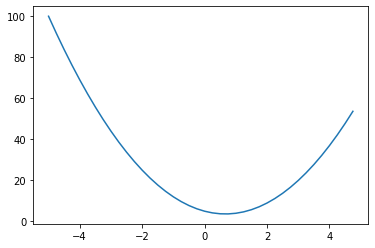

In [7]:
plt.plot(xs, ys)

In [8]:
h=0.000001
x = 3.0
f(x+h)

20.000014000003002

In [9]:
f(x+h) - f(x)

1.4000003002223593e-05

In [10]:
(f(x+h) - f(x))/h

14.000003002223593

<p> <font color= "yellow">More Complex</font></p>

In [11]:
# more complex
# inputs
a = 2.0
b = -3.0
c = 10.0
# single output d
d = a*b + c
print(d)

4.0


<h3> <font color= "yellow">Find derivative of d with respect to a b & c </font></h3>

<p> <font color= "yellow">Effect of a on the output and slope. Notice that differerentiating equation with respect to a, the slope becomes the value of b</font></p>

In [12]:
h = 0.0001

# inputs
a = 2.0
b = -3.0
c = 10.0

d1 = a*b + c
a += h
d2 = a*b + c

print('d1: ', d1)
# d2 will decrease because b is a negative number
print('d2: ', d2)
print('slope: ', (d2-d1)/h)

d1:  4.0
d2:  3.999699999999999
slope:  -3.000000000010772


<p> <font color= "yellow">Effect of b on the slope and ouput. Notice that differerentiating equation with respect to b, the slope becomes the value of a </font></p>

In [13]:
# inputs
a = 2.0
b = -3.0
c = 10.0

d1 = a*b + c
b += h
d2 = a*b + c

print('d1: ', d1)
# d2 will decrease because b is a negative number
print('d2: ', d2)
print('slope: ', (d2-d1)/h)

d1:  4.0
d2:  4.0002
slope:  2.0000000000042206


<p> <font color= "yellow">Effect of c on the output and slope. This will just increase the ouput by the value of c</font></p>

In [14]:
# inputs
a = 2.0
b = -3.0
c = 10.0

d1 = a*b + c
c += h
d2 = a*b + c

print('d1: ', d1)
# d2 will decrease because b is a negative number
print('d2: ', d2)
print('slope: ', (d2-d1)/h)

d1:  4.0
d2:  4.0001
slope:  0.9999999999976694


<h3> <font color= "yellow">Value class in micrograd</font></h3>

In [26]:
a = Value(2.0, label='a')
b = Value(-3.0, label='b')
c = Value(10, label='c')
e = a * b; e.label='e'
d = e + c; d.label='d'
f = Value(-2.0, label='f')

L = f * d; L.label='L'         # L is the output of the graph, L is the value of forward pass (-8)
print(f'a: {a}, b: {b}, c: {c}, d: {d}, e: {e}, f: {f}, L: {L}')

a: Value(data=2.0), b: Value(data=-3.0), c: Value(data=10), d: Value(data=4.0), e: Value(data=-6.0), f: Value(data=-2.0), L: Value(data=-8.0)


In [28]:
class Value:

  def __init__(self, data, _children=(), _op='', label = ''):# provide values for the attributes at runtime
    self.data = data
    self.grad = 0.0                 # affection of this value to the output
    self._backward = lambda: None   # function for backpropagation
    self._prev = set(_children)     # children variable keeps track of the values
                                    # which lead to this result
    self._op = _op                  # keeps track of the operations
    self.label = label              # for visualization purposes

  def __repr__(self):             # overwrites the standard return of the object
    return f"Value(data={self.data})"

  def __add__(self, other):       # what to do if two value objects are added
    other = other if isinstance(other, Value) else Value(other)   # for usage with scalars not defined as values (eg. a + 1)
    out = Value(self.data + other.data, (self, other), '+')

    def _backward():
      self.grad += 1.0 * out.grad    # applying chainrule on a sum-node
      other.grad += 1.0 * out.grad
    out._backward = _backward       # store the function for backpropagation
    return out

  def __neg__(self):              # -self
    return self * -1

  def __sub__(self, other):       # self - other
    return self + (-other)

  def __radd__(self, other):      # fallback for other * self
    return self * other

  def __mul__(self, other):       # what to do if two value objects are multiplied
    other = other if isinstance(other, Value) else Value(other)   # for usage with scalars not defined as values (eg. a * 2)
    out =  Value(self.data * other.data, (self, other), '*')

    def _backward():
      self.grad += other.data * out.grad   # applying chainrule on times-node
      other.grad += self.data * out.grad
    out._backward = _backward     # store the function for backpropagation
    return out

  def __rmul__(self, other):      # fallback for other * self
    return self * other

  def __pow__(self, other):
    assert isinstance(other, (int, float)), "only supporting int/float powers for now"
    out = Value(self.data**other, (self, ), f'**{other}')

    def _backward():
      self.grad += other * self.data**(other-1) * out.grad
    out._backward = _backward
    return out

  def __truediv__(self, other):   # self / other
    return self * other**-1

  def tanh(self):                 # implementing the tanh function
    x = self.data
    tanh = (math.exp(2*x) - 1)/(math.exp(2*x) + 1)
    out =  Value(tanh, (self, ), 'tanh')

    def _backward():
      self.grad += (1 - tanh**2) * out.grad # derviative of tanh
    out._backward = _backward     # store the function for backpropagation
    return out

  def exp(self):
    x = self.data
    out = Value(math.exp(x), (self, ), 'exp')

    def _backward():
      self.grad += out.data * out.grad  # derive e** and chainrule
    out._backward = _backward
    return out

  def backward(self):
    topo = []                     # build out topological order
    visited = set()
    def build_topo(v):
      if v not in visited:
        visited.add(v)
        for child in v._prev:
          build_topo(child)
        topo.append(v)
    build_topo(self)

    self.grad = 1.0               # topmost gradient is dself/dself = 1

    for node in reversed(topo):   # define grad beginning from top
      node._backward()

  

In [27]:
class Value:
    
                                    #  _children is a tuple, then we will convert in to a set, it will help us find the children values
                                    # inititialize _op as an empty set, it will help us find the operation that made the childen value
                                    # we added a labed for visualizing assistance
                                    # a variable that maintains the derivative of L with repect to that value (self.grad=0), initially it will be zero
                                    # so at innitialization we are assuming that every value does not impact the output cuz if the gradient is zero that means that changing this variable is not changing the loss Function L


    def __init__(self, data, _children=(), _op='', label=''):
        self.data = data
        self.grad = 0.0              # affection of this value to the output
                                     # which lead to this result
        self._backward = lambda: None     # function that will do the chain rule
        self._prev = set(_children)  #  prev will be the empty set, # children variable keeps track of the values
        self._op = _op               # keeps track of the operations
        self.label = label           # for visualization purposes
    
    
    def __repr__(self):
        return f"Value(data={self.data})"
    
    
    
    def __add__(self, other):              # have to use def __add__ to add objects   # feed in the children of this ._prev value. (self, other) are the children
        other = other if isinstance(other, Value) else Value(other)   # if other is an instance of value, but if it not an instance of value, we're going to assume it's a number, like int or float
                                                                      # helps us in a case where we have a=Value(2.0) now 1 + a = ?, if we don't do it, python will try to run 1.data + a.data which is impossible  
        out =  Value(self.data + other.data, (self, other), '+')
        
        def _backward():                    # the function that propagates the gradient
            self.grad += 1.0 * out.grad     # 1.0 is the local derivative of self in an addition outs, grad is the "global derivative" (this is the chain rule) N/B check on chain rule for addition to understand
            other.grad += 1.0 * out.grad
        out._backward = _backward          
        
        return out
    
    
    
    def __mul__(self, other):                                       # what to do if two value objects are multiplied
        other = other if isinstance(other, Value) else Value(other)  # check in __add__ for explanation
        out = Value(self.data * other.data, (self, other), '*')
        
        def _backward():
            self.grad +=  out.grad * other.data  # other.data is the value of the data out.grad is the global derivative N/B check on chain rule for multiplication like we did in the visualiation
            other.grad += out.grad * self.data
        out._backward = _backward
        
        return out
    
    
        
    def __pow__(self, other):                                        # power rule i.e,   d/dx of x^n = n*x^(n-1)
        assert isinstance(other, (int, float)), "only supporting int/float powers for now"
        out = Value(self.data**other, (self, ), f'**{other}')

        def _backward():                                             # n is other and self.data is x
          self.grad += other * (self.data ** (other-1)) * out.grad   # we're mutiplying by out.grad to chain it
        out._backward = _backward
        return out
    
    
                                     #for multiplying other * self eg 2 * a = error because python will 2.__mul__(a), so this function clears that error, but a * 2 will work normal cuz a.__mul__(2)
    def __rmul__(self, other):       # other * self
        return self * other
    
    def __neg__(self):              # -self
        return self * -1
    
    def __sub__(self, other):       # self - other
        return self + (-other)
    
    def __truediv__(self, other):   # self / other
        return self * other**-1     # eg a/b is the same as a * b^-1

    
    
                                    #  exponentiation function tanh, we could return x of a value instead of a tanh of the value
                                    # we'd be able to create tanh if we knew how to exp
                                    # tanh x= (sinh x /cosh x) = (e^(2x) - 1) / (e^(2x) + 1)
                                    # (self, ) -> children of this node, ther's just one child
    def tanh(self):                 # implementing the tanh function
        x = self.data
        tanh = (math.exp(2*x) - 1)/(math.exp(2*x) + 1)   #tanh output
        out = Value(tanh, (self, ), 'tanh')
        
        def _backward():
            self.grad += (1 - tanh**2) * out.grad         # derivation for tanh with respect to output, 1 - tanh**2 is the local derivative, out.grad is the global derivative (also chain rule) 
        out._backward = _backward
        
        return out
    
    
    
    def exp(self):                                      # finding derivation of tanh using the ex..... formula
        x = self.data
        out = Value(math.exp(x), (self, ), 'exp')       # exponentiate it
        
        def _backward():
            self.grad += out.data * out.grad            # d/dx of e^x = just e^x, and we've already calculated e^x above i.e out
        out._backward = _backward
    
        return out
    
    
    
    def backward(self):
                                      # topological sort algorithm
        topo = []
        visited = set()
        
        def build_topo(v):            # topological sort function
          if v not in visited :
            visited.add(v)
            for child in v._prev:     # go through all children
              build_topo(child)
            topo.append(v)
        build_topo(self)
        topo
        
        self.grad = 1.0
        for node in reversed(topo):
            node._backward()
            
    


In [32]:
d._prev
# {Value(data=-6.0), Value(data=10)} results from a * b and the c value
# {Value(data=-6.0), Value(data=10)} are the children values

{Value(data=-6.0), Value(data=10)}

In [64]:
a = Value(2.0)
b = Value(4.0)
a-b

Value(data=-2.0)

<h3> <font color= "yellow">Visualization</font></h3>

## Visualize it `Tommy`

In [3]:
from graphviz import Digraph

def trace(root):
    #builds a set of all nodes and edges in a graph
    nodes, edges = set(), set()
    def build(v):
        if v not in nodes:
          nodes.add(v)
          for child in v._prev:
            edges.add((child, v))
            build(child)
    build(root)
    return nodes, edges

def draw_dot(root):
    dot = Digraph(format='svg', graph_attr={'rankdir': 'LR'}) # LR = left to right
    
    nodes, edges = trace(root)
    for n in nodes:
      uid = str(id(n))
      # for any value in the graph, create a rectangular ('record') node for it
      dot.node(name = uid, label = "{ %s | data %.4f | grad %.4f }" % (n.label, n.data, n.grad), shape='record')
      if n._op:
        # if this value is a result of some operation, create an op node for it
        dot.node(name = uid + n._op, label = n._op)
        # and connect this node to it
        dot.edge(uid + n._op, uid)
        
    for n1, n2 in edges:
      # connect n1 to the op of n2
      dot.edge(str(id(n1)), str(id(n2)) + n2._op)
        
    return dot
    

grad is representing the derivative of the output, in this case L, with respect to the value it is attached to, eg grad 0.0000000 with respect to c

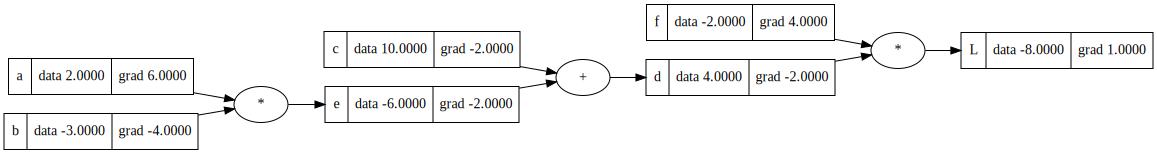

In [47]:
draw_dot(L)

# Determination of the gradient

In [51]:
# try to make L go up, we just need to go in the direction of the gradient
a.data += 0.01 * a.grad
b.data += 0.01 * b.grad
c.data += 0.01 * c.grad
f.data += 0.01 * f.grad

e = a * b
d = e + c
# L is the output of the graph, L is the value of forward pass (-8)
L = f * d

print(L.data)

-7.286496


# Manual Back Propagation Example 1

We want to know the derivation of L with respect to d and also f (to get dL/dd and dL/df)

L = d * f

(partial differentiation)

dL/dd = ? f 

dL/df = L



<br/>

As we move further left, we need to know the derivative of L with respect to c and also e

dL / dc = ?

We need to find out how c impacts L

what is the derivative of d with respect to c

d = c + e

(partial differentiation)

dd / dc = ? 1

dd / de = ? 1


What we actually want is dL/dc

we know how L impacts d and now we know how c and e impact d

how do we put that info together to write dL/dc? and the answer is the CHAIN RULE

CHAIN RULE: 
dy/dx = dy/du * du/dx

in short, we just multiply the derivatives

KNOW: 
dL / dd = -2
dd / dc = 1
dd / de = 1

WANT: 
dL/dc
dL/de

dL / dc = (dL / dd) * (dd / dc)
dL / de = (dL / dd) * (dd / de)

so dL/dc = -2 x 1 = -2.0
   dL/de = -2 x 1 = -2.0



<br/>

Now on to the last one

we wanna find the derivative of L with respect to a

dL / da = ?

e = a * b

de / da = ? b = -3
de / db = ? a = 2

we'll also use chain rule here

KNOW:
dL / de = -2.0

WANT:
dL/ da = ?
    CHAIN RULE:
        dL/da = (dL / de) * (de / da)
        dL/db = (dL / de) * (de / db)
        
 so dL / da = -2.0 x -3 = 6
    dL / db = -2.0 x 2.0 = -4


In [41]:
# this is our first grad that we found by getting the derivative of L with respect to L
L.grad = 1.0      # derivation of L with respect to L
f.grad = 4.0      # derivation of L with respect to f, the answer is d, from(L = d * f)
d.grad = -2       # derivation of L with respect to d, the answer id f, from(L = d * f)
c.grad = -2       # derivation of L with respect to c, we used chain rule     dL / dc = (dL / dd) * (dd / dc)
e.grad = -2       # derivation of L with respect to e, we used chain rule     dL / de = (dL / dd) * (dd / de)
a.grad = 6        # derivation of L with respect to a, we used chain rule      dL/da = (dL / de) * (de / da)
b.grad = -4       # derivation of L with respect to e, we used chain rule     dL/db = (dL / de) * (de / db)


We start from the end (right), we're interested to fill in the gradient.

What is the derivative of L with respect to L. It is one because if you add a small amount like 0.0001, the value of L will increase by 0.0001

This tells us that it is directly proportional

to prove the derivation, we can add + h to that number we are deriving in rspect of eg.  f = Value(-2.0+h). It should print the derivative of L with respect to f

In [50]:
# the reason we're defining a function is so that we don't mess up the global variables above
def lol():
    
    h = 0.001
    
    a = Value(2.0, label='a')
    b = Value(-3.0, label='b')
    c = Value(10, label='c')
    e = a * b; e.label='e'
    d = e + c; d.label='d'
    f = Value(-2.0, label='f')
    # L is the output of the graph, L is the value of forward pass (-8)
    L = f * d; L.label='L'
    L1 = L.data #L is a value node so we want it's data, hence L.data instead of L
    
    a = Value(2.0, label='a') # adding h will be measuring the derivative of L with respect to a
    b = Value(-3.0, label='b')
    b.data += h
    c = Value(10, label='c')
    e = a * b; e.label='e'
    d = e + c; d.label='d'
    f = Value(-2.0, label='f')
    # L is the output of the graph, L is the value of forward pass (-8)
    L = f * d; L.label='L'
    L2 = L.data
    
    #this should print the derivative of L with respect to a because L is the one we added a bit by h
    print((L2-L1)/h) #L2-L1 is how much L changed and then noarmalize it by h
lol()
    

-3.9999999999995595


# Manual Propagation Example 2

## Intro to Neurons

A quick intro to neurons and its basic biological and mathematical modelling can be found on the [cs231n Lecture Page](https://cs231n.github.io/neural-networks-1/) by Stanford university.

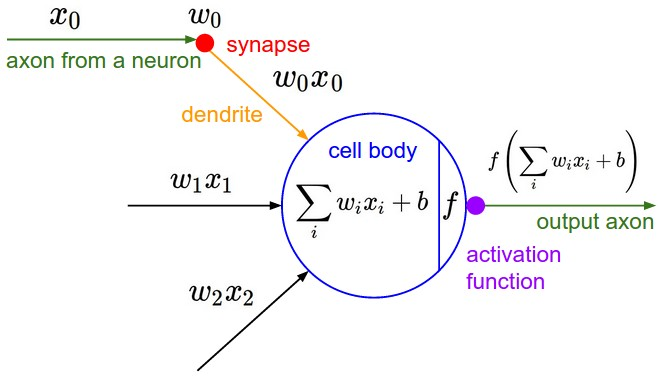

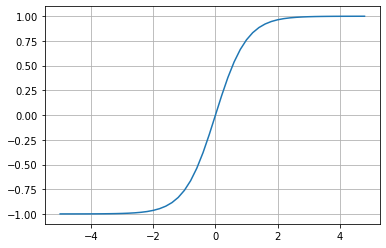

In [33]:
plt.plot(np.arange(-5,5,0.2), np.tanh(np.arange(-5,5,0.2))); plt.grid();

As shown the ``tanh`` function squashes a given input inbetween $-1.0$ and $1.0$. Also see [Hyperbolic functions](https://en.wikipedia.org/wiki/Hyperbolic_functions)

## Implementing and Breaking up `tanh()`

$$\tanh{x} = \frac{e^{2x}-1}{e^{2x}+1}$$

Two dimensional neuron - two inputs are gonna come in

we're trying to add x1w1 and x2w2 and add the bias i.e x1w1 + x2w2 + b

n is the body without the activation function

In [5]:
                                        # inputs x1, x2

x1 = Value(2.0, label='x1')
x2 = Value(0.0, label='x2')

                                        # weights of thiseuron
                                        # weights w1, w2  - they are the sybaptic strengths for each input
w1 = Value(-3.0, label='w1')
w2 = Value(1.0, label='w2')

                                        # b is the bias of the neuron
b = Value(6.8813735870195432, label='b')

                                        # x1w1 + x2w2 + b is what we wanna do
x1w1 = x1*w1; x1w1.label = 'x1w1'
x2w2= x2*w2; x2w2.label = 'x2w2'
x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label = 'x1*w1 + x2*w2'

                                        # n is the body without the activation function
n = x1w1x2w2 + b; n.label = 'n'

                                        # ouput -> it's going to return the tanh output of n
o = n.tanh(); o.label = 'o'             # o is the outcome of tanh

#Calling the backward prop function

In [ ]:
o.backward() # calling the back propagation function

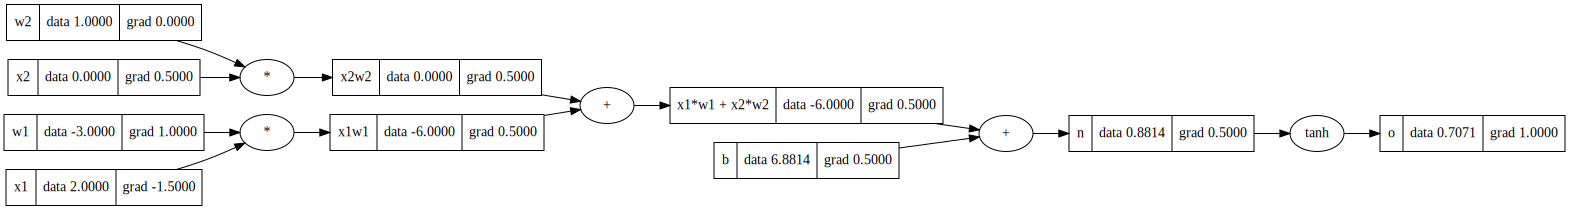

In [65]:
draw_dot(o)

## Breaking up tan h

$$\tanh{x} = \frac{e^{2x}-1}{e^{2x}+1}$$   to

$$o = \frac{e^{2x}-1}{e^{2x}+1}$$

In [67]:
                                        # inputs x1, x2

x1 = Value(2.0, label='x1')
x2 = Value(0.0, label='x2')

                                        # weights of thiseuron
                                        # weights w1, w2  - they are the sybaptic strengths for each input
w1 = Value(-3.0, label='w1')
w2 = Value(1.0, label='w2')

                                        # b is the bias of the neuron
b = Value(6.8813735870195432, label='b')

                                        # x1w1 + x2w2 + b is what we wanna do
x1w1 = x1*w1; x1w1.label = 'x1w1'
x2w2= x2*w2; x2w2.label = 'x2w2'
x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label = 'x1*w1 + x2*w2'

                                        # n is the body without the activation function
n = x1w1x2w2 + b; n.label = 'n'
                                        # break up tan h
#----
e = (2*n).exp()                         # (e^(2x) - 1) / (e^(2x) + 1)
o = (e-1) / (e + 1)                     
#---                                  
o.label = 'o'             # o is the outcome of tanh

#call backward prop function

In [68]:
o.backward() # calling the back propagation function

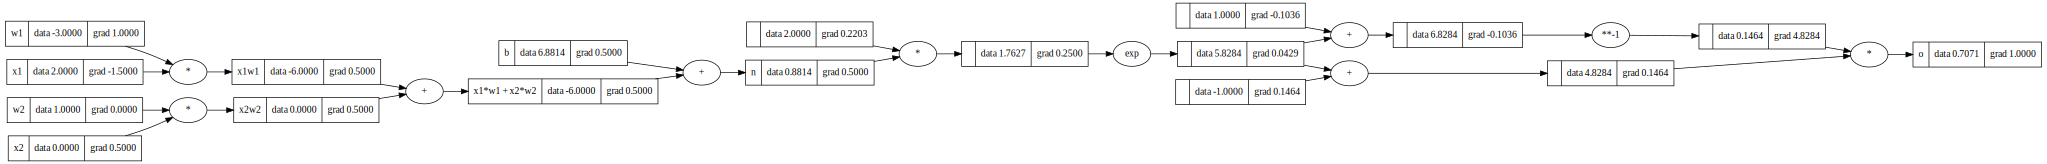

In [69]:
draw_dot(o)

Let's find out what is the derivative o, in respect to all the input here, what we care most is the derivative of these neurons on the weights, specifically, w2 and w1

### Manual Derivation of example 2

In [4]:
o.grad = 1.0                   # derivation of o with respect to o
n.grad = 0.5                   # derivation of 0 with respect to n through tanh. do/dn = 1-tanh(n)^2  |   o = tanh(n)  |   do/dn = 1-o^2   |   o = 0.7071  |  1-0.7071^2 = 0.5
b.grad = 0.5                   # derivation of o with respect to b, we use chain rule  |   do/db = d0/dn * dn/db  |   n = x1w1x2w2 + b  |  dev of n with respect to b   |   dn/db = 1  |    0.5*1 = 0.5
x1w1x2w2.grad = 0.5            # derivation of o with respect to x1w1x2w2, we use chain rule  |   do/x1w1x2w2 = d0/dn * dn/dx1w1x2w2  |   n = x1w1x2w2 + b  |  dev of n with respect to x1w1x2w2  |   dn/dx1w1x2w2 = 1  |    0.5*1 = 0.5
                               # N/B where there's a plus, the derivative is similar to the previous one
x1w1.grad = 0.5                # derivation of o with respect to x1w1  |  It's just similar to the above because we have a plus sign
x2w2.grad = 0.5                # derivation of o with respect to x2w2  |  It's just similar to the above because we have a plus sign

x2.grad = w2.data * x2w2.grad  # here we have basically shortened the chain rule |  
w2.grad = x2.data * x2w2.grad  # here we have basically shortened the chain rule | do/dw1 = d0/x1w1 * dx1w1/dw1

x1.grad = w1.data * x1w1.grad  # here we have basically shortened the chain rule | 
w1.grad = x1.data * x1w1.grad  # here we have basically shortened the chain rule | 

### Gradients using Backward function

In [5]:
o.grad = 1.0                   # initialize o.grad as 1
o._backward()                  #should propagate this grad through tanh
n._backward()
b._backward()
x1w1x2w2._backward()
x2w2._backward()
x1w1._backward()

We don't wana call the gradient function manually

### Topological sort 

What we're doing is we're just calling ._backward on all the nodes in a topological order

In [9]:
# topological sort algorithm
topo = []
visited = set()

def build_topo(v):            # topological sort function
  if v not in visited :
    visited.add(v)
    for child in v._prev:     # go through all children
      build_topo(child)
    topo.append(v)

# test
build_topo(o)
topo

[Value(data=6.881373587019543),
 Value(data=0.0),
 Value(data=1.0),
 Value(data=0.0),
 Value(data=-3.0),
 Value(data=2.0),
 Value(data=-6.0),
 Value(data=-6.0),
 Value(data=0.8813735870195432),
 Value(data=0.7071067811865476)]

In [12]:
a = Value(3.0, label = 'a')
b = a + a 



### Debugging

## A bug when useing one node multiple times
There appears a bug when a node is used multiple times and the ``_backward`` in [Value class](https://colab.research.google.com/github/AndreasMing/Learning/blob/main/NeuralnetsWithMicrograd.ipynb#scrollTo=eTvITsraSYKy&line=30&uniqifier=1) is defined
```
def _backward():
    self.grad = 1.0 * out.grad    # applying chainrule on a sum-node
    other.grad = 1.0 * out.grad
```
When the following code is executed:
```
a = Value(3.0, label='a')
b = a + a   ; b.label = 'b'
b.backward()
print('a.grad = ', a.grad)
```
The output is ``a.grad = 1.0`` which is wrong. The correct gradient would be $2$.

This bug appears when the ``backwards()`` function is called and a node is used multiple times, the ``.grad`` value will be overwritten. To tackle this bug the gradients must simply be added to the already present gradient:
```
def _backward():
    self.grad += 1.0 * out.grad    # applying chainrule on a sum-node
    other.grad += 1.0 * out.grad
```

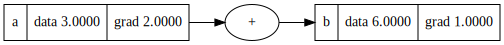

In [32]:
a=Value(3.0, label='a')
b = a + a ; b.label = 'b'
b.backward()
draw_dot(b)

#a.grad shouldn't be 1.0

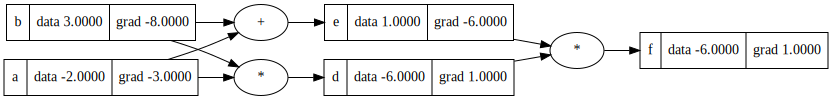

In [33]:
a = Value(-2.0, label='a')
b = Value(3.0, label='b')
d = a * b    ; d.label = 'd'
e = a + b    ; e.label = 'e'
f = d * e    ; f.label = 'f'
f.backward()
draw_dot(f)

# Quick intro to neurons
A quick intro to neurons and its basic biological and mathematical modelling can be found on the [cs231n Lecture Page](https://cs231n.github.io/neural-networks-1/) by Stanford university.

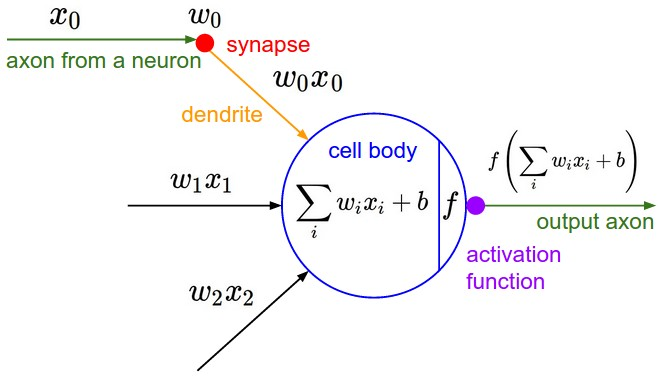

### Building a neural net library
In this section we build a neural net library (multi-layer perceptron) in micrograd. The basic architecture is based on the PyTorch API.

Neural nets are just a specific class of mathematical expressions.

## Single neuron

In [73]:
class Neuron:
  def __init__(self, nin):      # number of inputs
    # inputs to the neural net
    self.w = [Value(random.uniform(-1,1)) for _ in range(nin)]    # initialize a random weight for every input w
    self.b = Value(random.uniform(-1,1))                          # initialize a random bias b

  def __call__(self, x):        # n(x)                            # forward pass of the neuron
    # w * x + b                 # dot product of w, x plus b
    act = sum((wi*xi for wi, xi in zip(self.w, x)), self.b)       # cell body function
    out = act.tanh()                                              # activation function
    return out

  def parameters(self):         # # returns the parameter scalars
        return self.w + [self.b]


In [9]:
# testing
x = [2.0, 3.0]
n = Neuron(2)
n(x)

Value(data=0.970673839303468)

## Layer of neurons
Now we will define a single layer of neurons after the following schematic:

each layer has a number of neurons, and they're not conected with each other, but all of them are connected to the input 

a layer of neurons is just a set of neurons evaluated independently
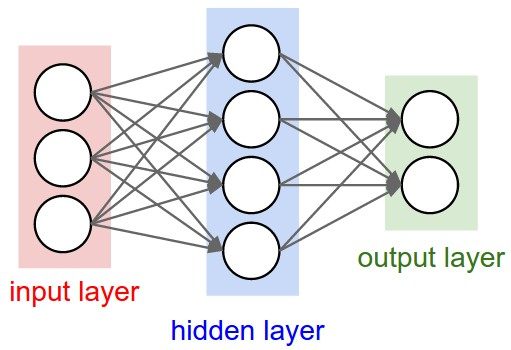

In [74]:
# just a list of neurons
class Layer:
  def __init__(self, nin, nout):   # number of inputs, nout=number of outputs(how many neurpns do you want in your layer)
    self.neurons = [Neuron(nin) for _ in range(nout)]   # a neuron per output

  def __call__(self, x):
    outs = [n(x) for n in self.neurons]                 # all output activation functions
    return outs[0] if len(outs) == 1 else outs

  def parameters(self):
    return [p for neuron in self.neurons for p in neuron.parameters()] # packs up parameters of all neurons

In [11]:
# testing
x = [2.0, 3.0]    # 2 dimensional input
n = Layer(2, 3)
n(x)
#it outputs 3 neurons

[Value(data=-0.4719972735246712),
 Value(data=-0.5420529520505717),
 Value(data=0.5119585673744307)]

## Multy Layer Perceptron
Next up is a class for the multy layer perceptron, in other words, multiple layers like follows:
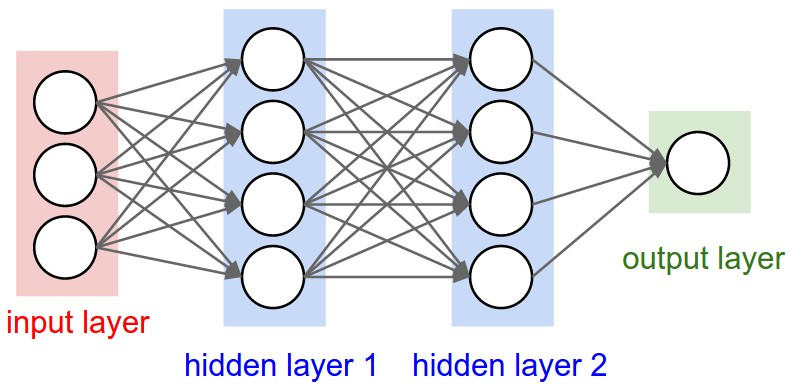

    Forward pass of an mlp

In [75]:
# multi-laye perceptron
class MLP:
  def __init__(self, nin, nouts):   # number of inputs, list outputs (entry per layer)
    sz = [nin] + nouts
    self.layers = [Layer(sz[i], sz[i+1]) for i in range(len(nouts))]

  def __call__(self, x):
    for layer in self.layers:
      x = layer(x)
    return x

  def parameters(self):
    return [p for layer in self.layers for p in layer.parameters()] # packs up parameters of all layers

In [60]:
# implementation of the architecture above
# we want 3 input neurons and 2 layers of 4 and an output unit
x = [2.0, 3.0, -1.0]    #3 dimensional input
n = MLP(3, [4, 4, 1])   #3 inputs into 2 layers of four, and one output
n(x)

Value(data=0.7515703790170047)

    Check all the weights and biases inside the entire neural net

In [76]:
n.parameters()

[Value(data=0.8278324347369718),
 Value(data=-0.830573638165573),
 Value(data=0.2624766098206685),
 Value(data=-0.9344054541737138),
 Value(data=0.27964658032250406),
 Value(data=-0.8213792606015822),
 Value(data=0.34932579414025894),
 Value(data=-0.2669130808466887),
 Value(data=-0.7045648403185336),
 Value(data=-0.06121411286011569),
 Value(data=0.9187531465259616),
 Value(data=0.3710345609523548),
 Value(data=0.5509062831579318),
 Value(data=0.9750377085522806),
 Value(data=0.8841490844291755),
 Value(data=-0.3569232228218242),
 Value(data=0.7252714843681958),
 Value(data=-0.9585387754321175),
 Value(data=-0.5518397834909223),
 Value(data=-0.1978520324333451),
 Value(data=-0.986771996142265),
 Value(data=-0.11042591028439587),
 Value(data=-0.6067817149661816),
 Value(data=0.18750920816219963),
 Value(data=0.5999416390336942),
 Value(data=-0.17956786533740213),
 Value(data=-0.3604974924524597),
 Value(data=-0.5668282539873246),
 Value(data=0.3451768567882617),
 Value(data=-0.88247897

    total number of parameters = 41

In [77]:
len(n.parameters())

41

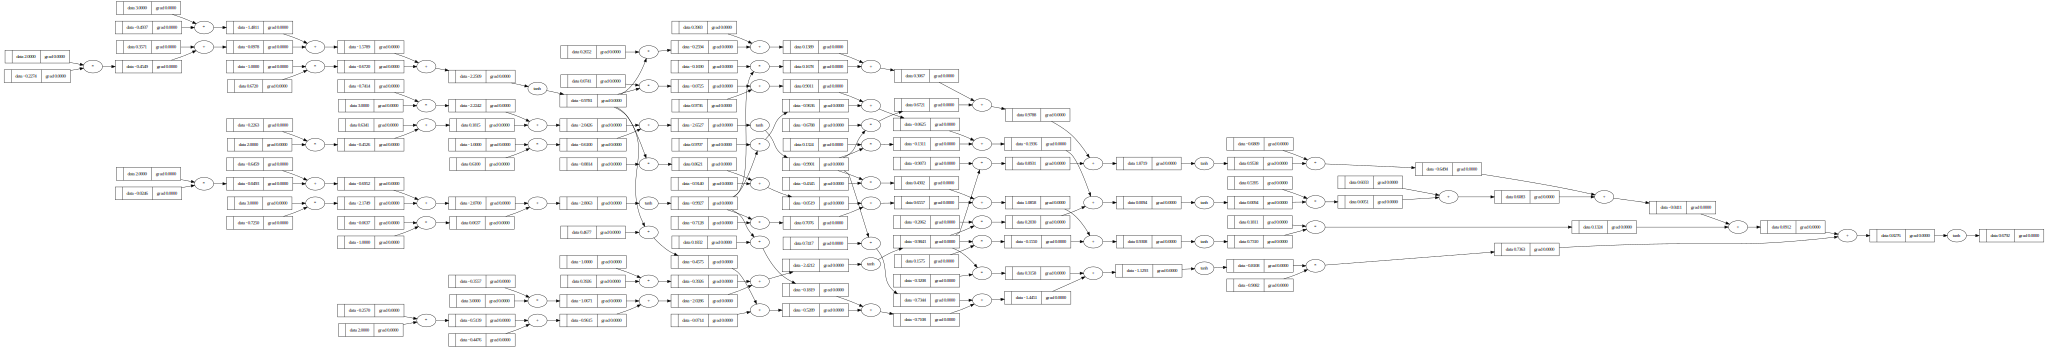

In [10]:
draw_dot(n(x))

In [79]:
# 4 possible inputs
xs = [
    [2.0, 3.0, -1.0],
    [3.0, -1.0, 0.5],
    [0.5, 1.0, 1.0],
    [1.0, 1.0, -1.0],
]
ys = [1.0, -1.0, -1.0, 1.0] # 4 desired targets, they should corespond. i.e  [2.0, 3.0, -1.0] should output 1.0, 3.0, -1.0, 0.5] should output -1.0
# ypred = [n(x) for x in xs]
# ypred

    We need them to be similar to desired output, so we are going to minimize the loss function, we need it to be very minimal
       Loss Function => A loss function is a function that compares the target and predicted output values; measures how well the neural network models the training data.

In [121]:
# caluclate loss
loss = sum((yout - ygt)**2 for ygt, yout in zip(ys, ypred))
print('loss = ', loss)

# loss backpropagation
loss.backward()     # backpropagation through the loss function and four forward passes of the network

print('grad = ', n.layers[0].neurons[0].w[0].grad)  # gradient of the first weight of the first neuron of the first layer
print('data = ', n.layers[0].neurons[0].w[0].data)  # value of the corresponding input

loss =  Value(data=0.0001495014719953071)
grad =  -0.0028792014097921564
data =  0.8913167624330665


    Before gradient descent, the loss was very high (0.7), we managed to minimize it

In [ ]:
draw_dot(loss)      # show the whole mathematical tree of the loss function and four forward passes of the network

# Perfoming gradient descent(training)

In [122]:
print('loop\tloss')
for k in range(20):
    
    # forward pass - evaluate the loss
    ypred = [n(x) for x in xs]
    loss = sum((yout - ygt)**2 for ygt, yout in zip(ys, ypred))
    
    # backward pass
    for p in n.parameters():       ## zero grad (because gradients are adding up)
        p.grad = 0
    loss.backward()
    
    # update
    for p in n.parameters():
        p.data += -0.05 * p.grad   #negative cuz we wanna decrease the loss and slifgtly increase data 0.05 is the learning rate
   
    print(k, '\t' , loss.data)
    

loop	loss
0 	 0.0001494712149285385
1 	 0.000149320199681637
2 	 0.00014916985529858195
3 	 0.00014902017406650105
4 	 0.00014887114840655868
5 	 0.00014872277087099427
6 	 0.0001485750341402588
7 	 0.00014842793102021507
8 	 0.0001482814544393981
9 	 0.000148135597446389
10 	 0.00014799035320720366
11 	 0.00014784571500279004
12 	 0.00014770167622656948
13 	 0.00014755823038203712
14 	 0.00014741537108044726
15 	 0.0001472730920385284
16 	 0.00014713138707628227
17 	 0.00014699025011480883
18 	 0.00014684967517421827
19 	 0.00014670965637156237


In [123]:
ypred

[Value(data=0.993426998613153),
 Value(data=-0.9999963542019221),
 Value(data=-0.9962634470256225),
 Value(data=0.9884783762017071)]